<a href="https://colab.research.google.com/github/i-bukhari/Responsible-AI/blob/main/The_Laplace_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Laplace Mechanism
## Responsible AI using Ethical Algorithm Design


#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [ ]:
# URL
url = "https://www.cis.upenn.edu/~mkearns/teaching/EADSpring24/california_housing_train.csv"

# Load the dataset
data = pd.read_csv(url)


#Exploratory Data Analysis (EDA)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


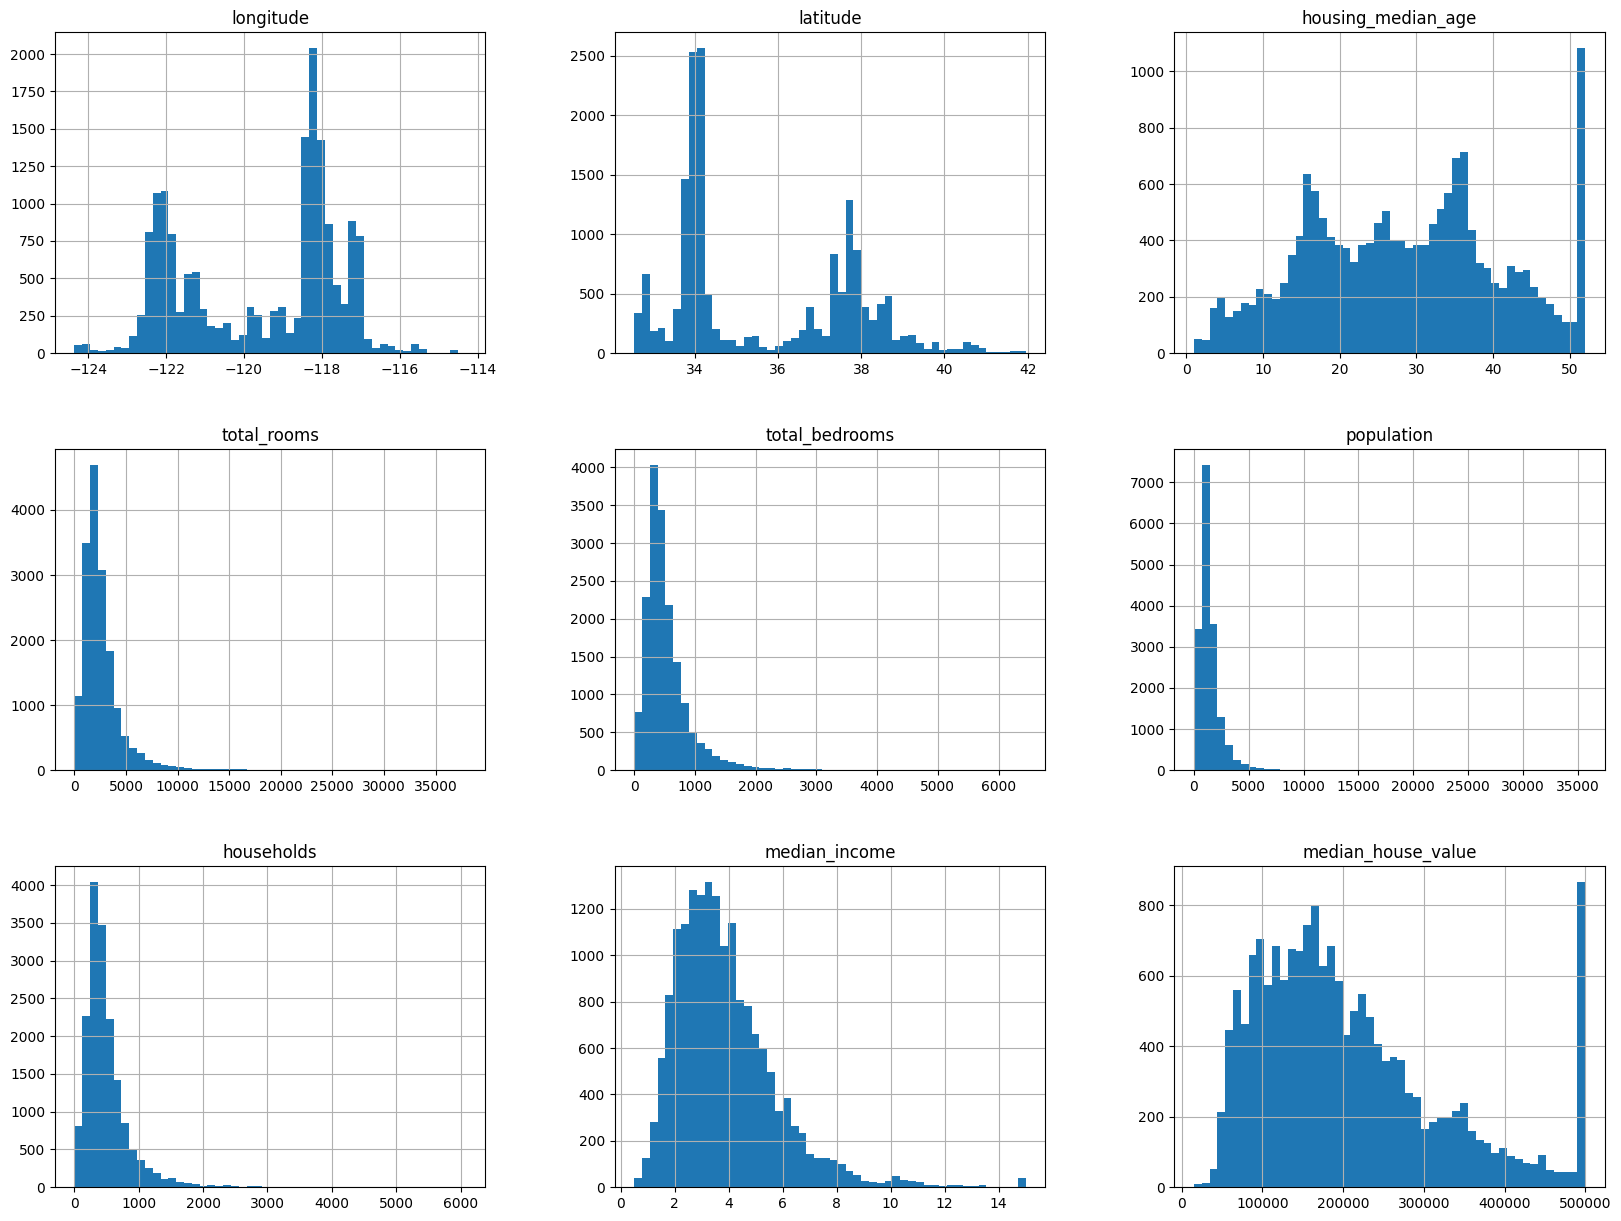

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

#Histogram Plots

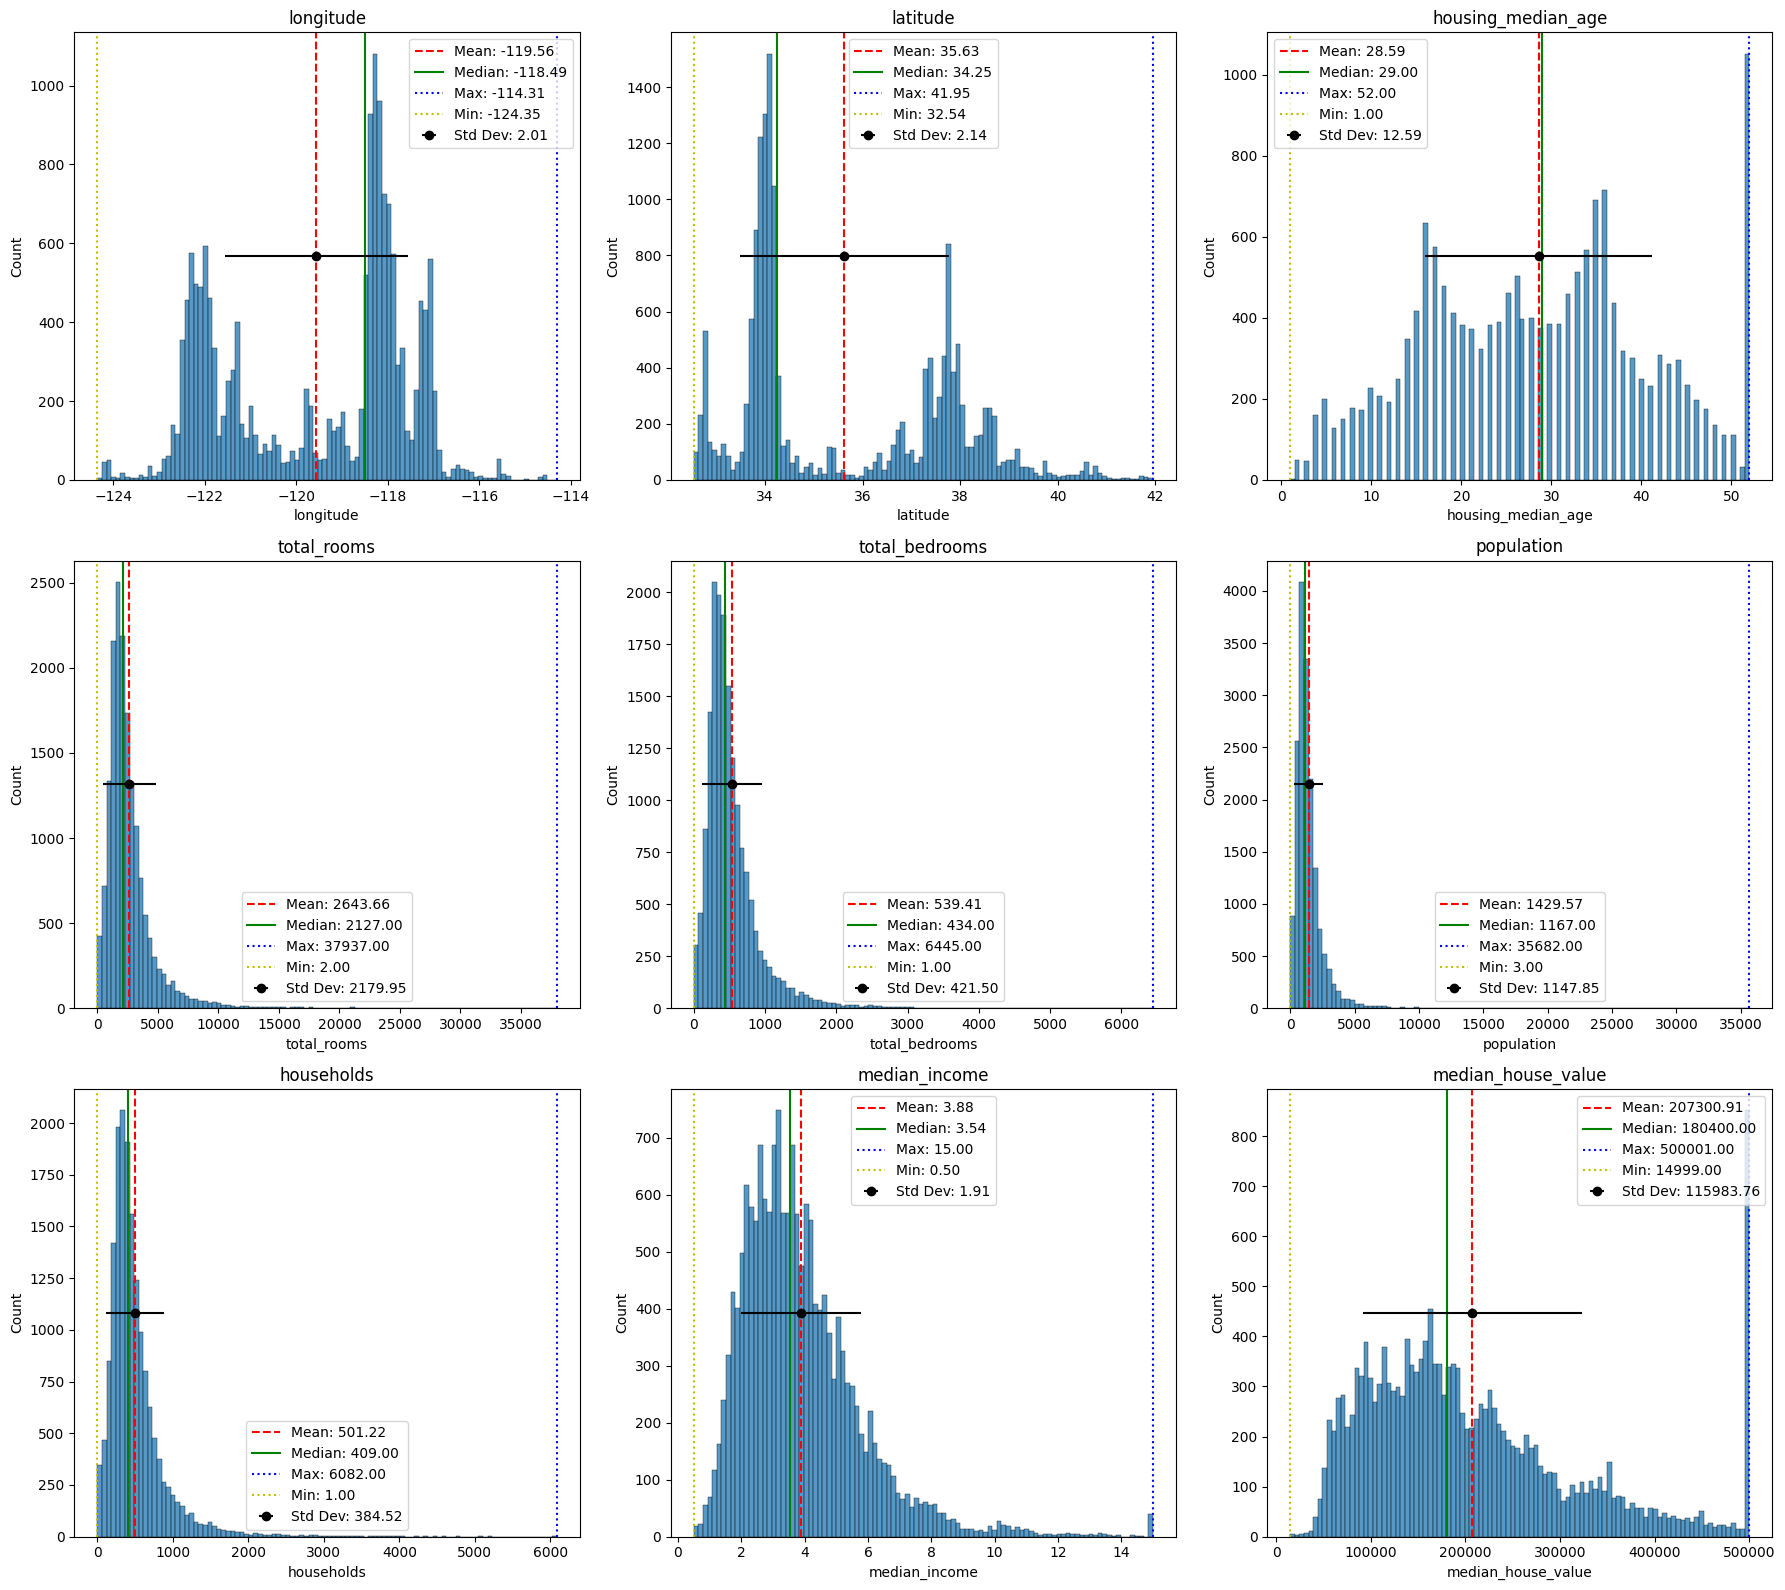

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=100, kde=False, ax=axes[i])
    mean_val = data[col].mean()
    median_val = data[col].median()
    max_val = data[col].max()
    min_val = data[col].min()
    std_val = data[col].std()

    # Annotations for mean, standard deviation, median, max and min values
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    axes[i].axvline(max_val, color='b', linestyle=':', label=f'Max: {max_val:.2f}')
    axes[i].axvline(min_val, color='y', linestyle=':', label=f'Min: {min_val:.2f}')

    # Error bar for standard deviation
    axes[i].errorbar(mean_val, axes[i].get_ylim()[1] / 2, xerr=std_val, fmt='o', label=f'Std Dev: {std_val:.2f}', color='black')

    axes[i].legend()
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


#Normalize the Dataset

In [ ]:
data_normalized = (data - data.min()) / (data.max() - data.min())
data_normalized.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


#Laplace Mechanism (LM)

In [ ]:
def laplace_mechanism(true_value, epsilon, sensitivity, num_runs):
  """
    This function implements the Laplace Mechanism of Differential Privacy.

    params:
      true_value: The true/noise-free value of a function (e.g. mean, standard deviation, etc.)
      epsilon: The privacy budget
      sensitivity: The sensitivity of the variable
      num_runs: The number of samples from the LM to return

    Returns: An array of noisy samples

  """
  b = sensitivity / epsilon
  noise = np.random.laplace(loc=0.0, scale=b, size=num_runs)
  noisy_samples = true_value + noise

  return noisy_samples


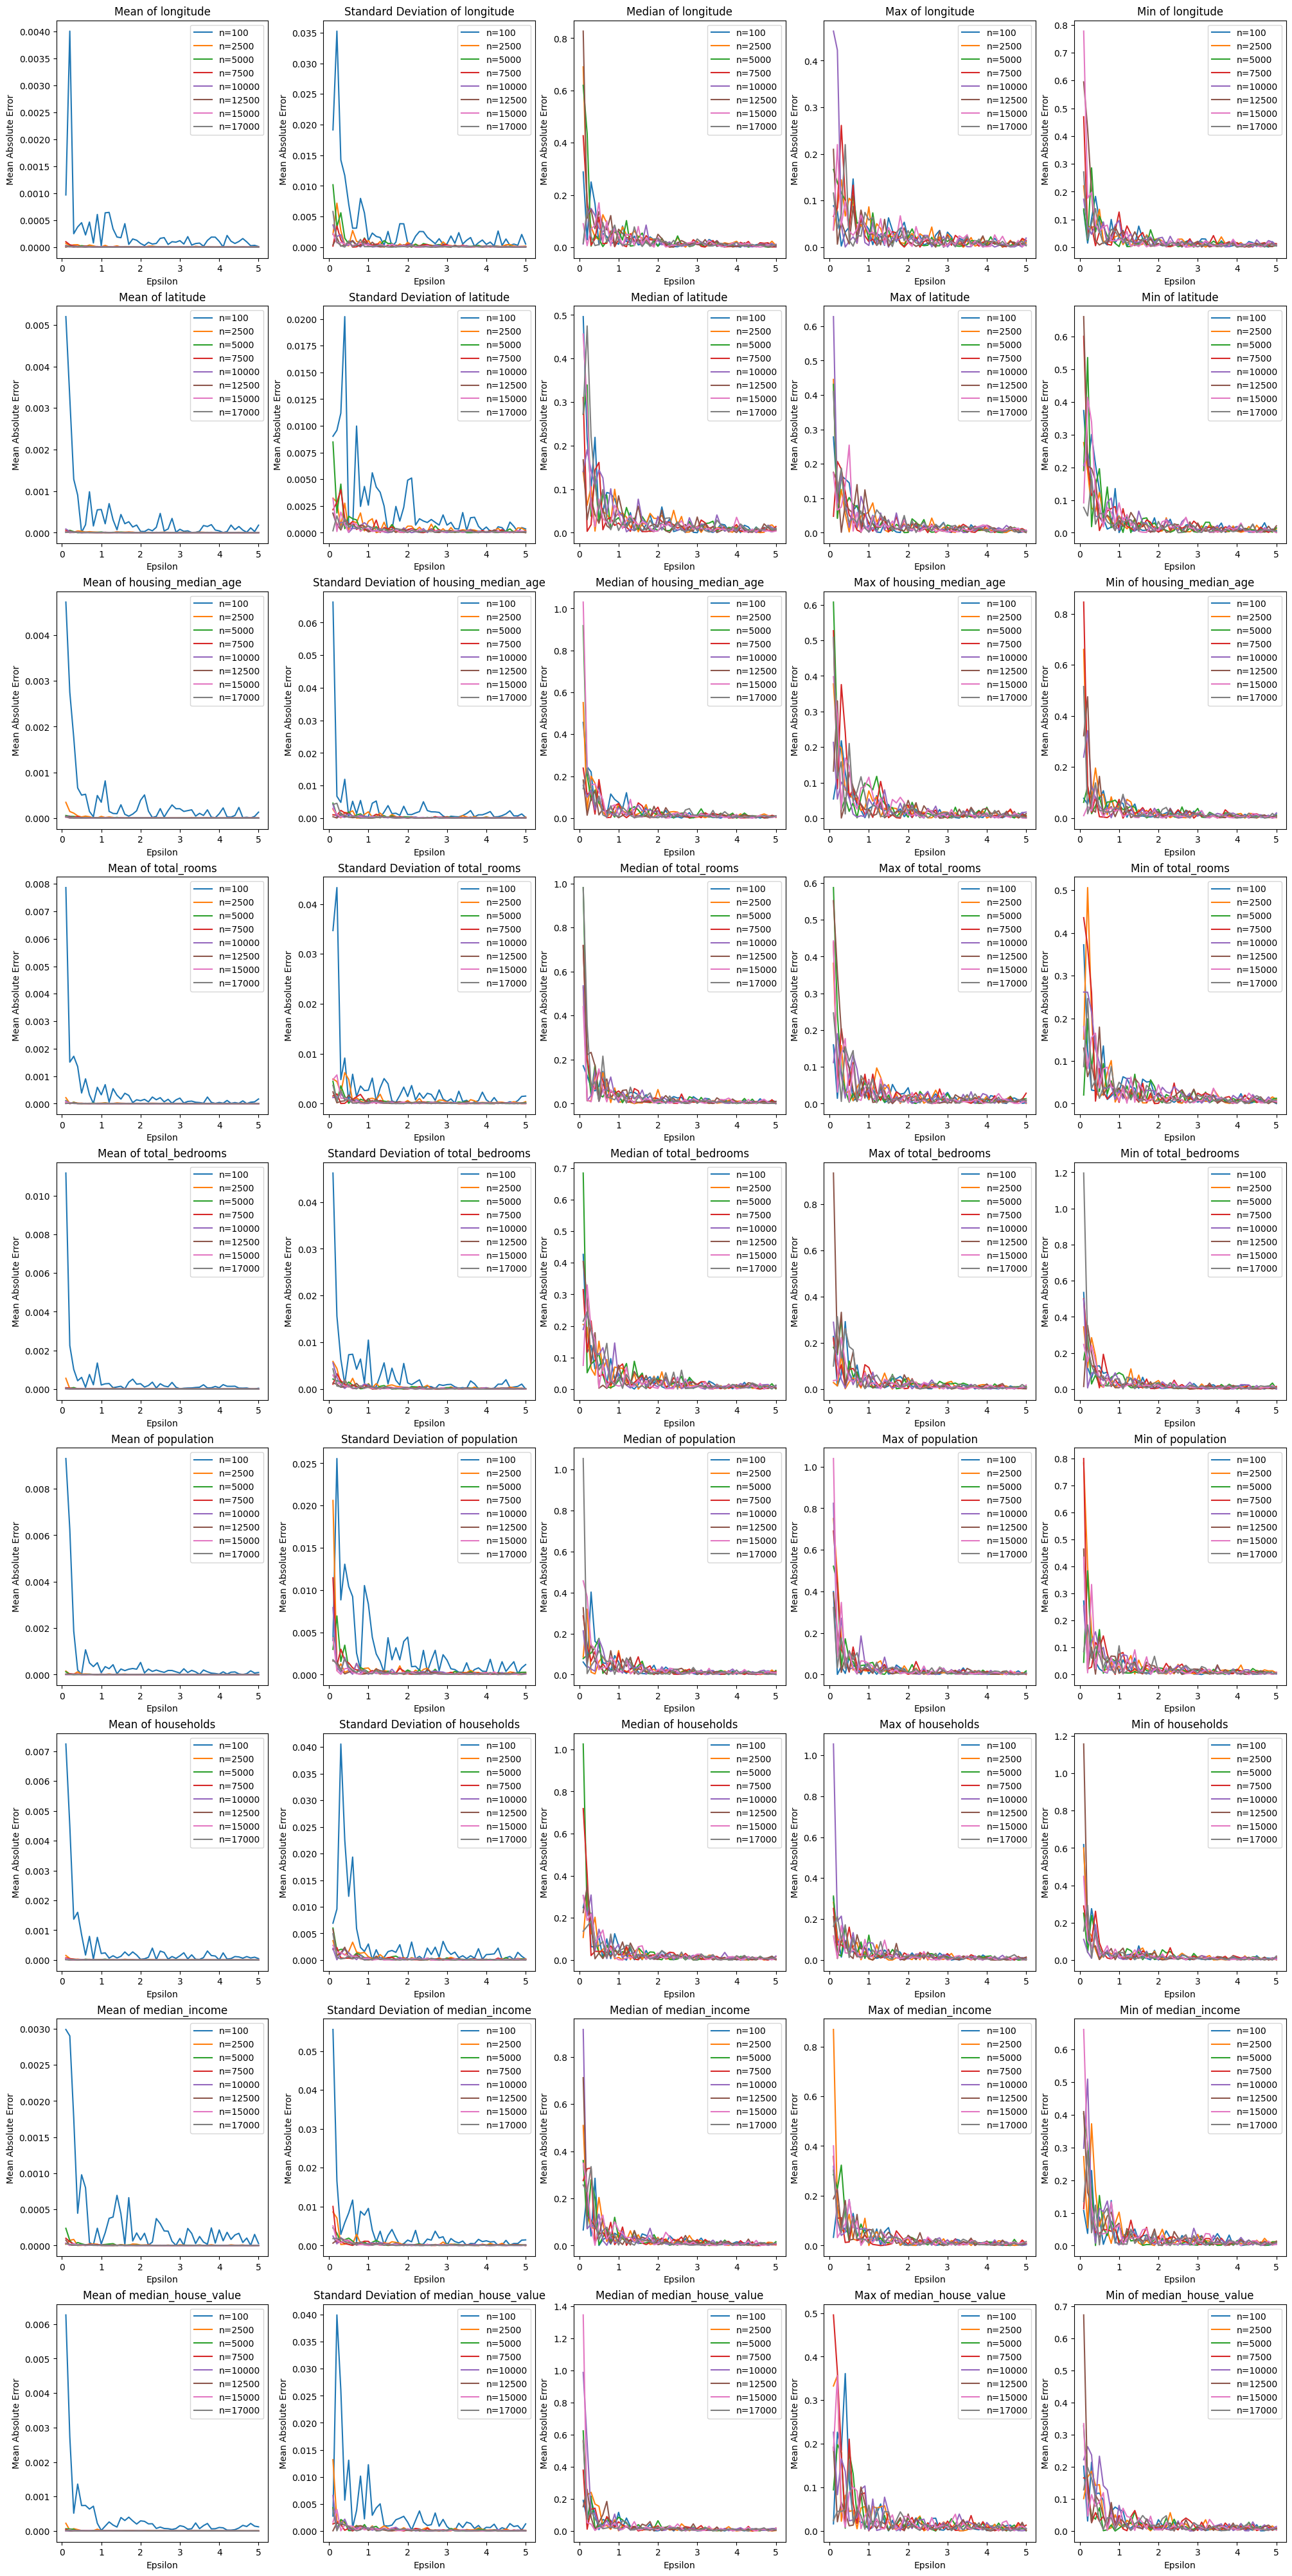

In [ ]:
statistics_functions = {
    'Mean': np.mean,
    'Standard Deviation': np.std,
    'Median': np.median,
    'Max': np.max,
    'Min': np.min
}

epsilons = np.arange(0.1, 5.1, 0.1)
n_values = [100, 2500, 5000, 7500, 10000, 12500, 15000, 17000]

fig, axs = plt.subplots(len(data_normalized.columns), len(statistics_functions), figsize=(20, 40), constrained_layout=True)

for col_idx, col in enumerate(data_normalized.columns):
    for stat_idx, (stat_name, stat_func) in enumerate(statistics_functions.items()):
        ax = axs[col_idx][stat_idx]
        for n in n_values:
            accuracies = []
            for epsilon in epsilons:
                sample = data_normalized[col].sample(n=n, replace=False)
                true_value = stat_func(sample)
                if stat_name == 'Mean':
                  sensitivity = 1/n
                if stat_name == 'Median':
                  sensitivity = 1
                if stat_name == 'Standard Deviation':
                  sensitivity = 1 / np.sqrt(n)
                if stat_name == 'Max':
                  sensitivity = 1
                if stat_name == 'Min':
                  sensitivity = 1

                noisy_value = laplace_mechanism(true_value, epsilon, sensitivity, 1000)
                error = np.abs(np.mean(noisy_value) - true_value)
                accuracies.append(error)
            ax.plot(epsilons, accuracies, label=f'n={n}')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Mean Absolute Error')
        ax.set_title(f'{stat_name} of {col}')
        ax.legend(loc='upper right')

plt.show()


#Analysis

In the evolving landscape of data privacy, the concept of differential privacy (DP) offers a robust framework for protecting individual information while enabling valuable insights from data. This analysis leverages the California Housing Prices dataset to illustrate the application of the Laplace Mechanism (LM) for DP and visualizes the implications of this approach. We dissect the results from the plots generated above, compare these findings with the theoretical understanding of DP discussed in class, and pinpoint functions that optimally balance the trade-off between data utility and privacy.

The histogram plots serve as a benchmark for the original, unaltered distributions of various features such as longitude, latitude, housing median age, total rooms, and more. These plots are annotated with key statistical measures — mean, median, max, min, and standard deviation — to provide a comprehensive snapshot of the data before the injection of privacy-preserving noise. Notably, these histograms are annotated with critical statistical metrics. For instance, the mean longitude of -119.56, median of -118.49, and a standard deviation of 2.01, give a snapshot of the geographic distribution of the housing data. Similarly, the median income histogram showcases a mean value of 3.88, median of 3.54, with a more compressed standard deviation of 1.91, indicative of a narrower spread in data relative to geographic coordinates.

Upon applying the Laplace Mechanism, the resultant plots depict the divergence from the original values as a function of epsilon, the privacy parameter, and the sample size (n). A smaller epsilon signals a more stringent privacy constraint, resulting in greater noise infusion and consequentially, higher deviations from the true statistical values. The value of n is crucial; larger datasets inherently afford better privacy due to the "averaging out" effect of the added noise across a broader base.

The second set of plots demonstrates the variance in statistical measures' accuracy with changing values of n and epsilon. For example, when examining the "Mean of longitude" plot across various n values, we can observe that the error diminishes as n increases, suggesting that larger datasets reduce the relative impact of DP-induced noise implying that each individual data point's impact on the overall mean is less pronounced in extensive datasets. This is in line with the principles of DP where statistical noise has a diluted effect on larger data pools. Conversely, the max and min functions exhibit a constant sensitivity, regardless of the dataset size, thereby revealing their susceptibility to significant noise-induced deviations even with sizeable data.

The empirical results resonate with the theory presented in the lectures. Differential privacy introduces a probabilistic distorting of data characterized by the pivotal parameter epsilon. As discussed in class, the differential privacy framework ensures that the probability of any outcome is nearly the same, whether or not any individual's data is included in the dataset.

In line with the theory, the plots clearly demonstrate an inverse relationship between epsilon and the precision of the computed statistics. For robust privacy (low epsilon), we observe increased mean absolute errors across the board. This relationship highlights the DP axiom where, for any output set S, the likelihood of obtaining S with any individual's data present or absent differs by a factor controlled by epsilon.

As the value of epsilon decreases, the "noise" added to the data increases, thus bolstering the privacy of individual data points but at the expense of statistical accuracy. This effect is explicitly visible in the plots illustrating the "Standard Deviation of population," where higher values of epsilon correspond to lower mean absolute errors.

The "Median of median_house_value" plot showcases an evident variation for lower values of n, where even a moderate epsilon results in a significant deviation from the true median. This illustrates the sensitivity of the median function to DP interventions and exemplifies the challenges in preserving data utility for functions with constant sensitivity, irrespective of dataset size.

The "sweet spot" for DP, as deduced from the visual analyses, comprises functions where the added noise has minimal impact on data utility. The "Mean of median_income" plot underscores this concept. The mean, normalized over the dataset, falls within this sweet spot. The plots reveal that the mean retains proximity to its true value even as epsilon shrinks, due to its sensitivity shrinking proportionally with n. The standard deviation, too, appears to be within this favorable realm for sufficiently large datasets, given its sensitivity decreases with the square-root of n.

Contrastingly, the max, min, and median functions maintain a static sensitivity, making them less ideal for DP. As evidenced by the plots, these functions manifest a persistent disparity from their true values, unaffected by the dataset size, thus situating them outside the sweet spot. For instance, the "Max of housing_median_age" and "Min of total_bedrooms" plots show significant distortion, particularly for smaller datasets. These functions inherently possess higher sensitivity, meaning individual data alterations significantly influence the function's output. Consequently, they fall outside the sweet spot, requiring more noise to maintain the same level of privacy, thereby decreasing utility.

The synthesized results from the California Housing Prices dataset instantiate the delicate balance Differential Privacy strives to achieve between privacy and utility. The practical application of the Laplace Mechanism affirms the theoretical assertions, demonstrating that while differential privacy can substantially mask individual data points, it can also retain overall data utility, especially for functions with diminishing sensitivity. Functions like the mean and standard deviation, especially over large datasets, retain their utility and demonstrate minimal deviation from their true values, aligning them with the DP sweet spot. The insight garnered here validates the foundational DP theory and exemplifies its application in safeguarding data privacy while preserving overall data utility. As data privacy continues to gain prominence, this analysis underscores the significance of selecting appropriate statistical functions and adjusting parameters to harness the full potential of differential privacy.